<a href="https://colab.research.google.com/github/hiddenntreasure/Pose-Estimation-of-Image-on-cpu/blob/master/Human_Pose_Estimation_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
img_link = '/content/378-3780801_david-murray-news-person-full-body-png.png'

In [0]:
BODY_PARTS = {"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}

In [0]:
POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]

In [0]:
import numpy as np
import argparse
import time
import cv2
#Specify the paths for the 2 files
protoFile = "/content/drive/My Drive/Colab Notebooks/Pose estimation/Untitled folder/k.prototxt"
weightsFile = "/content/drive/My Drive/Colab Notebooks/Pose estimation/Untitled folder/pose_iter_160000.caffemodel"

# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile,weightsFile)
#net = cv2.dnn.readNet()

In [0]:
# Read image
frame = cv2.imread(img_link)

# Specify the input image dimensions
inWidth = 368
inHeight = 368

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

In [0]:
fheight = frame.shape[0]
fwidth = frame.shape[1]
print(frame.shape[0])
print(frame.shape[1])


526
820


In [0]:
output = net.forward()

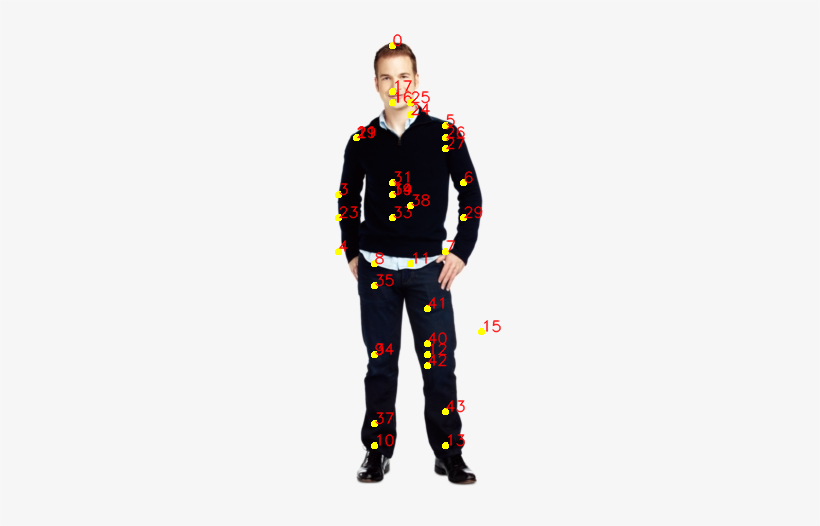

In [0]:
from google.colab.patches import cv2_imshow
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
for i in range(44):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    #print(prob)

    # Scale the point to fit on the original image
    x = (fwidth* point[0]) / W
    y = (fheight* point[1]) / H
    #print(x,y)
    if prob > 0.1 :
        cv2.circle(frame, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

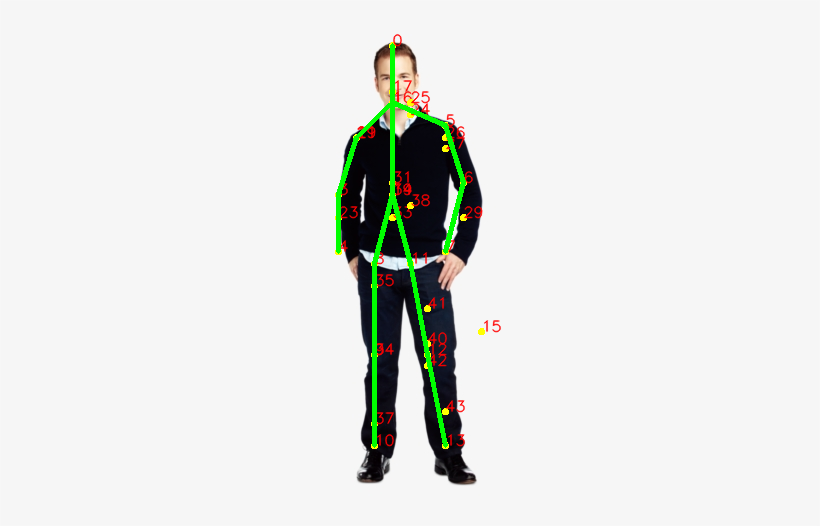

In [0]:
for pair in POSE_PAIRS:
    partA = BODY_PARTS[pair[0]]
    partB = BODY_PARTS[pair[1]]
    #print(BODY_PARTS[pair[0]])

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 0), 3)
        
cv2_imshow(frame)